<a href="https://colab.research.google.com/github/shreshthsk/MLProjects/blob/main/Bird_Species_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!ls '/content/drive/My Drive'

 Aadhaar.pdf
 Aaxaasasasxsasaą
 assignment2021.gdoc
'Bird Data'
 Cengage1-Print-Selected-SDSF.xlsx
'Chi-Square Test.gslides'
 Classroom
'Colab Notebooks'
'Copy of Anime Neon Vibes Marketing Plan by Slidesgo.gslides'
'Copy of Copy of Anime Neon Vibes Marketing Plan by Slidesgo.gslides'
'Copy of SHRESHTH KAUSHAL - August 16, 11:42 PM.gdoc'
 CSAssignment.pdf
 CSTest.pdf
 Data_Structure_UT3.pdf
 Discrete_UT2.pdf
 DOC-20221225-WA0002..pdf
 Drawing.sdr
 DS6A_108_Shreshth_DS6A_2031.pdf
 DS6A-2031_Shreshth_DS6A-109.pdf
 DS6A-2031_Shreshth_NoSQL.docx
 DS6A-2031_Shreshth_Prob_A1.pdf
'DS6A-2031_UT1_Data_Structure (1).pdf'
 DS6A-2031_UT1_Data_Structure.pdf
 DS6A-2031_UT1_Discrete.pdf
'Edited - M_Tech_Shreshth_UT2_CS.pdf'
'End-Sem Examination.pdf'
 End_Sem_OOPS.pdf
'euc-ichy-yoz - Nov 6, 2022.gjam'
'Flowchart .pdf'
'Getting started.pdf'
'Google Keep Document.gdoc'
 IMG_20200819_203424.jpg
 IMG_20210617_141341.jpg
 InternshipProject.mp4
'Kim, Tae - A Guide to Japanese Grammar · A Japanese Approach 

In [37]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from matplotlib.image import imread
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from os import listdir
from sklearn.preprocessing import LabelBinarizer

EXTRACT

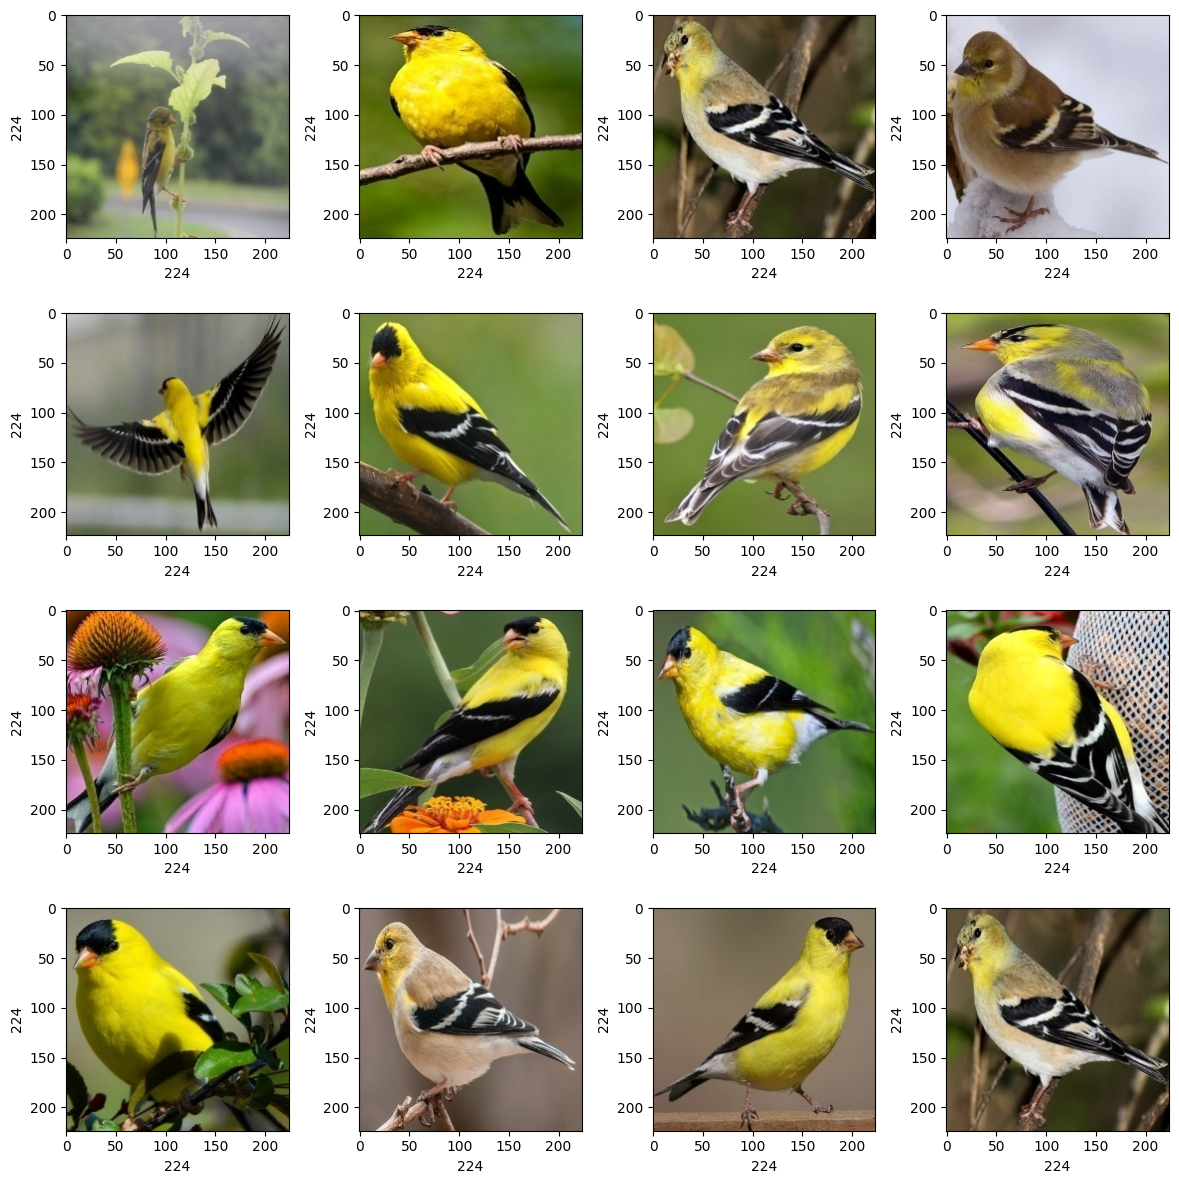

In [38]:
#Visualizing images
plt.figure(figsize = (12,12))
path = "/content/drive/My Drive/Bird Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path+"/"+random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize = 10)
  plt.ylabel(rand_img.shape[0],fontsize = 10)

In [39]:
dir = '/content/drive/My Drive/Bird Data/Bird Speciees Dataset'
root_dir = listdir(dir)
image_list,label_list = [],[]

In [40]:
#Reading and Converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    images = cv2.imread(image_path)
    images = img_to_array(images)
    image_list.append(images)
    label_list.append(directory)

TRANSFORMATION

In [41]:
#Balancy Check
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [42]:
total_classes = len(label_counts)
total_classes

6

In [43]:
image_list[0].shape

(224, 224, 3)

In [44]:
#Total images
label_list = np.array(label_list)
label_list.shape

(811,)

In [45]:
x_train,x_test,y_train,y_test = train_test_split(image_list,label_list,test_size = 0.2,random_state = 10)

In [46]:
#Normalizing
x_train = np.array(x_train,dtype = np.float16)/225.0
x_test = np.array(x_test,dtype = np.float16)/225.0
x_train = x_train.reshape(-1,224,224,3)
x_test = x_test.reshape(-1,224,224,3)

In [48]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

[0 1 2 3 4 5]


In [49]:
#Split training data into validating and training data
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.2)

Modelling

In [51]:
model = Sequential()
model.add(Conv2D(8,(3,3),padding = "same",input_shape = (224,224,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(16,(3,3),padding = "same",activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(3,3),padding = "same",activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(32,activation = "relu"))
model.add(Dense(total_classes,activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)      

In [54]:
model.compile(loss = "categorical_crossentropy",optimizer = Adam(0.0005),metrics = ["accuracy"])

In [55]:
#Overfitted Data
epochs = 50
batch_size = 128
history = model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs,validation_data = (x_val,y_val))

Epoch 1/50
5/5 [==============================] - 22s 4s/step - loss: 1.7424 - accuracy: 0.2587 - val_loss: 1.6564 - val_accuracy: 0.2615
Epoch 2/50
5/5 [==============================] - 15s 3s/step - loss: 1.5306 - accuracy: 0.4421 - val_loss: 1.5985 - val_accuracy: 0.3231
Epoch 3/50
5/5 [==============================] - 15s 3s/step - loss: 1.4957 - accuracy: 0.3842 - val_loss: 1.5044 - val_accuracy: 0.3231
Epoch 4/50
5/5 [==============================] - 15s 3s/step - loss: 1.3576 - accuracy: 0.4653 - val_loss: 1.4103 - val_accuracy: 0.4615
Epoch 5/50
5/5 [==============================] - 15s 3s/step - loss: 1.2668 - accuracy: 0.5927 - val_loss: 1.3776 - val_accuracy: 0.4769
Epoch 6/50
5/5 [==============================] - 15s 3s/step - loss: 1.2017 - accuracy: 0.5116 - val_loss: 1.2521 - val_accuracy: 0.5692
Epoch 7/50
5/5 [==============================] - 15s 3s/step - loss: 1.0789 - accuracy: 0.6718 - val_loss: 1.1900 - val_accuracy: 0.6077
Epoch 8/50
5/5 [==================

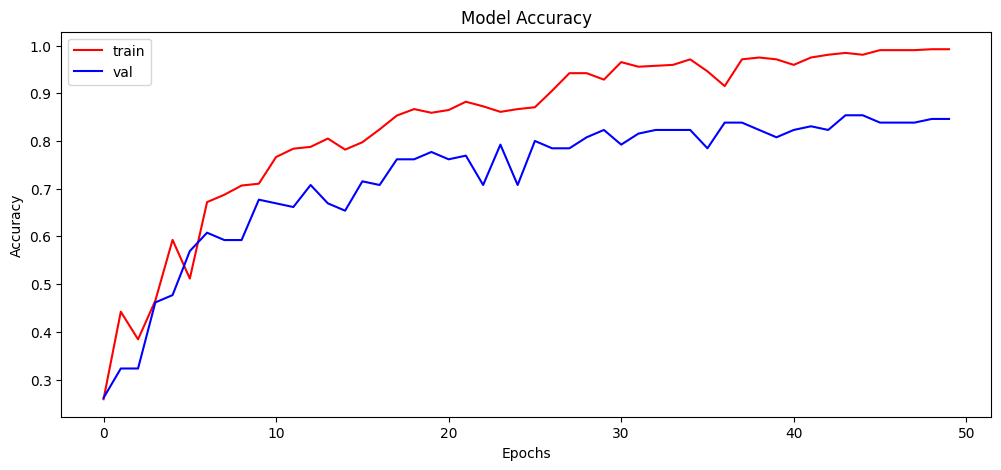

In [57]:
#Training History
plt.figure(figsize = (12,5))
plt.plot(history.history['accuracy'],color = 'r')
plt.plot(history.history['val_accuracy'],color = 'b')
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel("Epochs")
plt.legend(['train','val'])
plt.show()

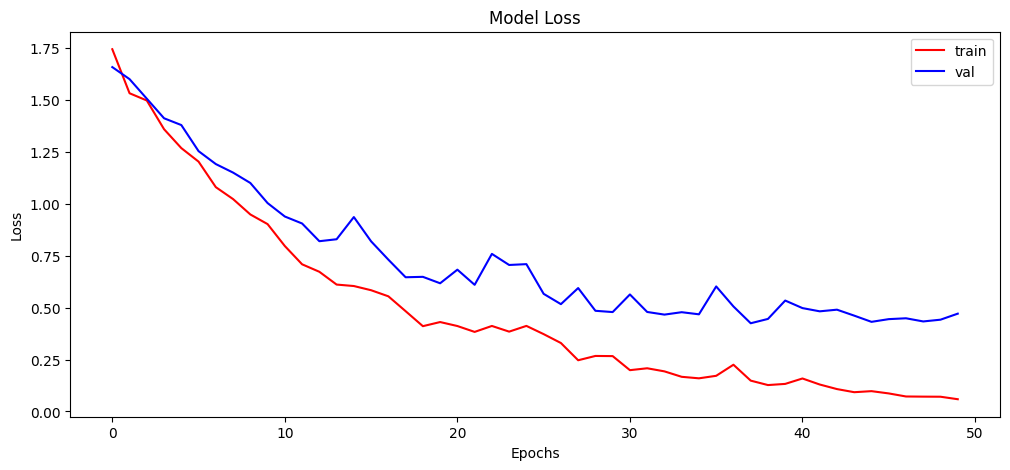

In [59]:
#Loss History
plt.figure(figsize = (12,5))
plt.plot(history.history['loss'],color = 'r')
plt.plot(history.history['val_loss'],color = 'b')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train','val'])
plt.show()

In [60]:
#Calculating the test accuracy
scores = model.evaluate(x_test,y_test)
print(f'Test Accuracy : {scores[1]*100}')

6/6 [==============================] - 2s 380ms/step - loss: 0.5278 - accuracy: 0.8344
Test Accuracy : 83.43558311462402


In [61]:
#Prediction
y_pred = model.predict(x_test)

6/6 [==============================] - 2s 229ms/step


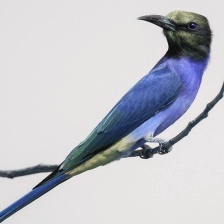

In [62]:
#Image to Compare
img = array_to_img(x_test[10])
img

In [63]:
labels = lb.classes_
print(labels)
print("Original : ",labels[np.argmax(y_test[10])])
print("Predicted: ",labels[np.argmax(y_pred[10])])

[0 1 2 3 4 5]
Original :  2
Predicted:  2
